---
# Importing necessary libraries
---

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from glob import glob
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

---
# Defining input image size and number of classes
---

In [2]:
input_shape = (224, 224, 3)
num_classes = 2

---
# Creating the CNN model
---

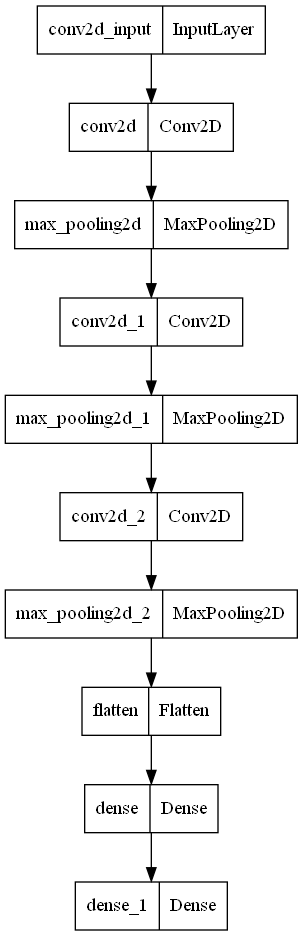

In [3]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
plot_model(model)

---
# Compiling the model
---

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
batch_size = 32

---
# Creating data generators
---

In [5]:
train_data_dir = 'E:/NSUT/6th Sem/Deep Learning/Garbage Classification using CNNs/DATASET/TRAIN'
test_data_dir = 'E:/NSUT/6th Sem/Deep Learning/Garbage Classification using CNNs/DATASET/TEST'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=input_shape[:2],
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=input_shape[:2],
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


---
# Training Model
---

In [6]:
epochs = 10

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/10
706/706 [==============================] - 1083s 2s/step - loss: 0.4265 - accuracy: 0.8171 - val_loss: 0.2984 - val_accuracy: 0.8806
Epoch 2/10
706/706 [==============================] - 1081s 2s/step - loss: 0.3444 - accuracy: 0.8553 - val_loss: 0.2976 - val_accuracy: 0.8830
Epoch 3/10
706/706 [==============================] - 1070s 2s/step - loss: 0.3065 - accuracy: 0.8728 - val_loss: 0.2729 - val_accuracy: 0.8989
Epoch 4/10
706/706 [==============================] - 1117s 2s/step - loss: 0.2562 - accuracy: 0.8967 - val_loss: 0.2821 - val_accuracy: 0.9017
Epoch 5/10
706/706 [==============================] - 1214s 2s/step - loss: 0.1865 - accuracy: 0.9262 - val_loss: 0.3967 - val_accuracy: 0.8842
Epoch 6/10
706/706 [==============================] - 1107s 2s/step - loss: 0.1055 - accuracy: 0.9602 - val_loss: 0.4390 - val_accuracy: 0.8977
Epoch 7/10
706/706 [==============================] - 1072s 2s/step - loss: 0.0609 - accuracy: 0.9794 - val_loss: 0.5667 - val_accuracy:

---
# Model Prediction
---

In [7]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

---
# Testing model on test data
---

1/1 [==============================] - 1s 1s/step
This image -> Organic


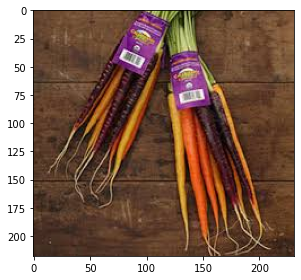

In [8]:
test_img = cv2.imread("E:/NSUT/6th Sem/Deep Learning/Garbage Classification using CNNs/DATASET/TEST/O/O_12573.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 28ms/step
This image -> Recyclable


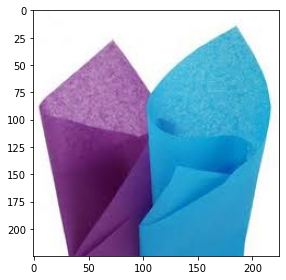

In [9]:
test_img = cv2.imread("E:/NSUT/6th Sem/Deep Learning/Garbage Classification using CNNs/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

---
# Training Vs Validation Accuracy
---

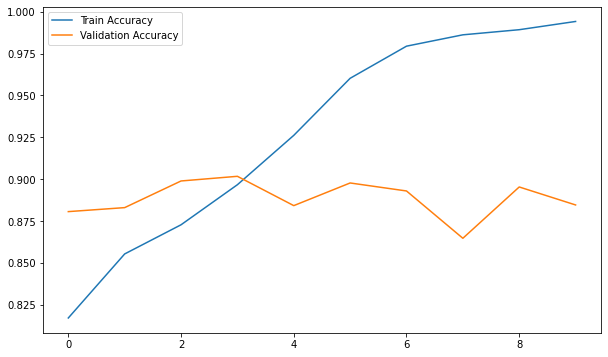

In [10]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

---
# Training Vs Validation Loss
---

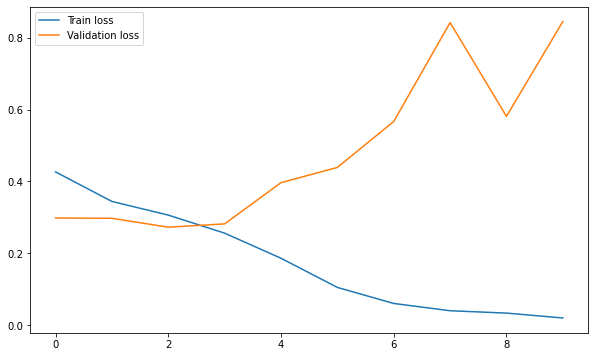

In [11]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

---
# Evaluating the model
---

In [12]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

79/79 [==============================] - 31s 388ms/step - loss: 0.8447 - accuracy: 0.8846
Test accuracy: 0.8846001029014587
